<a href="https://colab.research.google.com/github/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
# https://radimrehurek.com/gensim/models/word2vec.html
# https://analyticsindiamag.com/word2vec-vs-glove-a-comparative-guide-to-word-embedding-techniques/

https://medium.com/intelligentmachines/word-embedding-and-one-hot-encoding-ad17b4bbe111

<h3> Agenda </h3>

*   Use Pretrained Word Vectors
*   Use word vecotrs as feature for classification









In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [ ]:
gensim.__version__

'4.2.0'

In [ ]:
np.random.seed(42)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Use Pretrained Word Vectors

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = api.load('glove-twitter-50')

In [ ]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
# wv = api.load('word2vec-google-news-300')
# wv.save('/content/drive/MyDrive/Content Creation/Youtube Tutorials/vectors.kv')

In [ ]:
wv['apple']

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [ ]:
len(wv['apple'])

300

In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('/content/drive/MyDrive/Content Creation/Youtube Tutorials/vectors.kv')

In [ ]:
wv.similarity("apple", "mango")

0.57518554

In [ ]:
wv.similarity("apple", "car")

0.12830707

In [ ]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [ ]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


In [ ]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


#### Semantic regularities captured in word embeddings

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('man', 0.6628609299659729),
 ('queen', 0.6438563466072083),
 ('girl', 0.6136074066162109)]

In [ ]:
words = ["one",'two','man','woman','table']

In [ ]:
# https://deepai.org/dataset/text8

In [ ]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 0.41775945,  0.906729  ],
       [ 0.52036536,  1.3947775 ],
       [-1.2547548 , -0.3259122 ],
       [-1.6043063 , -0.64717937],
       [ 1.920937  , -1.328415  ]], dtype=float32)

### Visualizing these word vectors

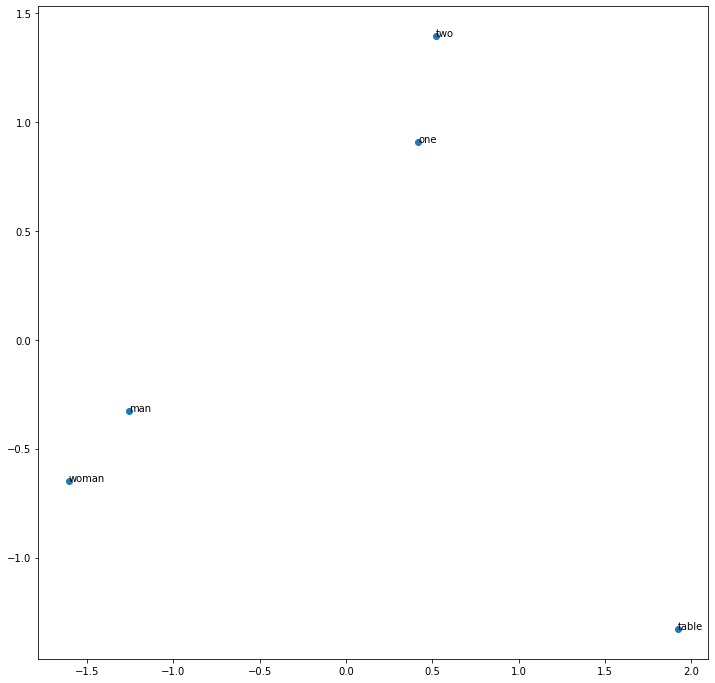

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Content Creation/Youtube Tutorials/datasets/toxic_commnets_500.csv",error_bad_lines=False, engine="python")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,comment_text,toxic
0,Your knowledge of Hebrew? Thank god that Jossi...,0
1,==Tablighi Jamaat and allegations of terrorism...,0
2,"""\nWell it's understandable not wanting the in...",0
3,"""\n\n Please stop adding nonsense to Wikipedia...",0
4,"Saint Petersburg\nPlease, leave the sister cit...",0


In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)



    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
sent_vec("I am happy")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([-0.08447266,  0.10973685, -0.00453404,  0.18362863, -0.05944824,
       -0.04013497, -0.10041155,  0.03710938, -0.02503313,  0.04729353,
       -0.07543836, -0.16434152, -0.1116333 ,  0.02915737, -0.12290737,
        0.10421317, -0.00425502,  0.27535575, -0.01681083, -0.08075387,
       -0.26747349, -0.07281712,  0.08138602, -0.02498954, -0.05358887,
       -0.07969884, -0.30385045,  0.10531616, -0.03756278, -0.04029192,
        0.06455776, -0.02200753, -0.11361694, -0.12702288, -0.19824219,
        0.06921387, -0.14557757,  0.18457031, -0.05542864,  0.10093471,
        0.10728237, -0.07920619, -0.01236398,  0.11485073,  0.09437779,
        0.02020509, -0.08954729, -0.12911551, -0.0363072 ,  0.05212402,
       -0.12200056,  0.23856027, -0.04056222,  0.12512207,  0.05569894,
        0.1237793 , -0.08370536, -0.05489676, -0.0291748 , -0.18401228,
       -0.14592634, -0.04910714, -0.15844727, -0.03636387,  0.00628662,
       -0.30032785, -0.11404855,  0.08530971,  0.01077706,  0.05

In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'empty', 'more', 'she', 'upon', 'really', 'less', 'so', 'still', 'no', 'behind', 'nothing', 'become', 'every', 'using', 'yourself', 'who', 'others', 'such', 'before', 'but', 'toward', 'everyone', '’ve', 'because', 'never', 'see', 'whereupon', 'seeming', 'throughout', 'up', 'latterly', 'while', 'within', 'amongst', 'once', 'around', 'our', 'former', 'eight', 'full', 'these', 'be', 'front', 'whom', 'became', 'either', 'least', 'other', 'neither', 'has', 'where', 'only', 'do', 'part', 'something', 'those', 'was', 'give', 'down', 'is', 'might', 'wherever', 'amount', 'ca', 'n‘t', 'doing', 'each', 'your', 'beside', '‘ve', 'of', 'also', 'been', 'whole', 'n’t', 'about', 'two', 'formerly', '‘ll', 'often', 'put', 'someone', 'besides', 'ever', 'quite', '‘d', 'becoming', 'thence', 'even', 'last', 'twenty', '‘s', 'just', 'am', 'should', 'off', 'among', 'into', 'together', 'almost', 'ours', 'were', 'below', 'none', 'rather', 'fifteen', 'regarding', 'twelve', 'four', 'if', 'enough', 'moreover', 'six

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [ ]:
data.head()

,comment_text,toxic,tokens
0,Your knowledge of Hebrew? Thank god that Jossi...,0,"[knowledge, hebrew, thank, god, jossi, speak, ..."
1,==Tablighi Jamaat and allegations of terrorism...,0,"[tablighi, jamaat, allegation, terrorism==, ad..."
2,"""\nWell it's understandable not wanting the in...",0,"[understandable, want, infobox, overfill, info..."
3,"""\n\n Please stop adding nonsense to Wikipedia...",0,"[stop, add, nonsense, wikipedia, consider, van..."
4,"Saint Petersburg\nPlease, leave the sister cit...",0,"[saint, petersburg, leave, sister, city, ill, ..."


In [ ]:
data['vec'] = data['tokens'].apply(sent_vec)

In [ ]:
data.head()

,comment_text,toxic,tokens,vec
0,Your knowledge of Hebrew? Thank god that Jossi...,0,"[knowledge, hebrew, thank, god, jossi, speak, ...","[0.0632793719951923, -0.007477980393629808, 0...."
1,==Tablighi Jamaat and allegations of terrorism...,0,"[tablighi, jamaat, allegation, terrorism==, ad...","[-0.049352010091145836, -0.007761637369791667,..."
2,"""\nWell it's understandable not wanting the in...",0,"[understandable, want, infobox, overfill, info...","[0.02009953090122768, -0.027743094308035714, -..."
3,"""\n\n Please stop adding nonsense to Wikipedia...",0,"[stop, add, nonsense, wikipedia, consider, van...","[0.08058844672309028, 0.048272026909722224, 0...."
4,"Saint Petersburg\nPlease, leave the sister cit...",0,"[saint, petersburg, leave, sister, city, ill, ...","[0.05062408447265625, 0.007540130615234375, 0...."


In [ ]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [ ]:
X[0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.88
Logistic Regression Precision: 0.8958333333333334
Logistic Regression Recall: 0.86
